In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_table(r"../datafiles/fruit_data_with_colors.txt", sep='\t' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [3]:
df.head(2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59


In [4]:
y = df.iloc[:,0].values
X = df.iloc[:,3:].values

In [5]:
import seaborn as sns

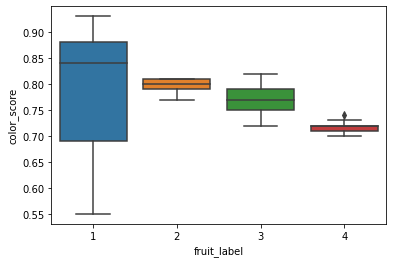

In [10]:
sns.boxplot(x='fruit_label', y = 'color_score', data = df);

In [7]:
df['fruit_label'].value_counts()

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64

In [11]:
# Perform ANOVA for each of the variables wrt. fruit_label

In [12]:
np.corrcoef(X[:,1], X[:,2])
# Checking correlation between width and height

array([[1.        , 0.39684805],
       [0.39684805, 1.        ]])

In [14]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
# X_sc = sc.fit_transform(X)

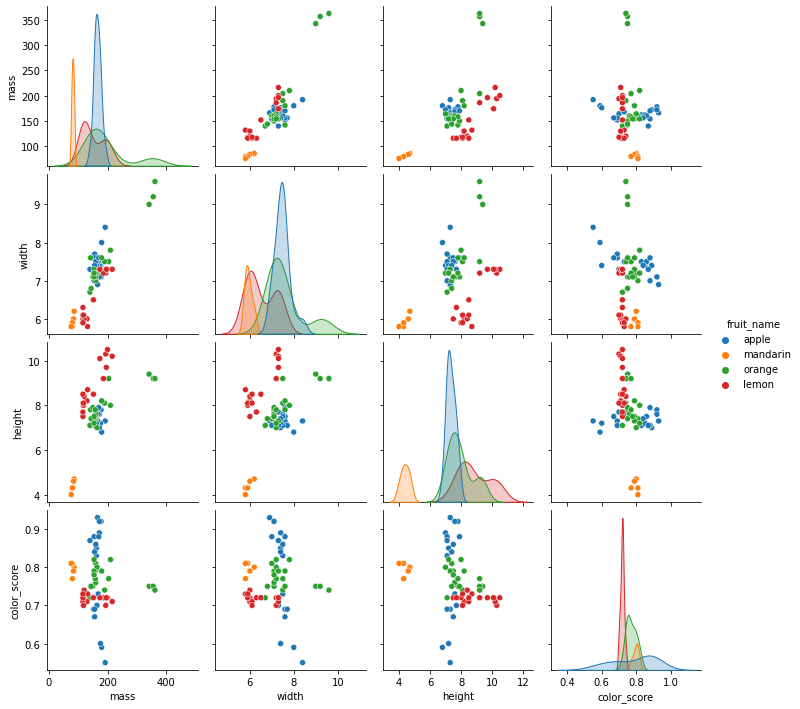

In [21]:
sns.pairplot(df[['mass', 'width', 'height', 'color_score', 'fruit_name']], hue='fruit_name')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
from sklearn.model_selection import train_test_split
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47, 4) (12, 4) (47,) (12,)


In [24]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8333333333333334

In [25]:
from sklearn import tree

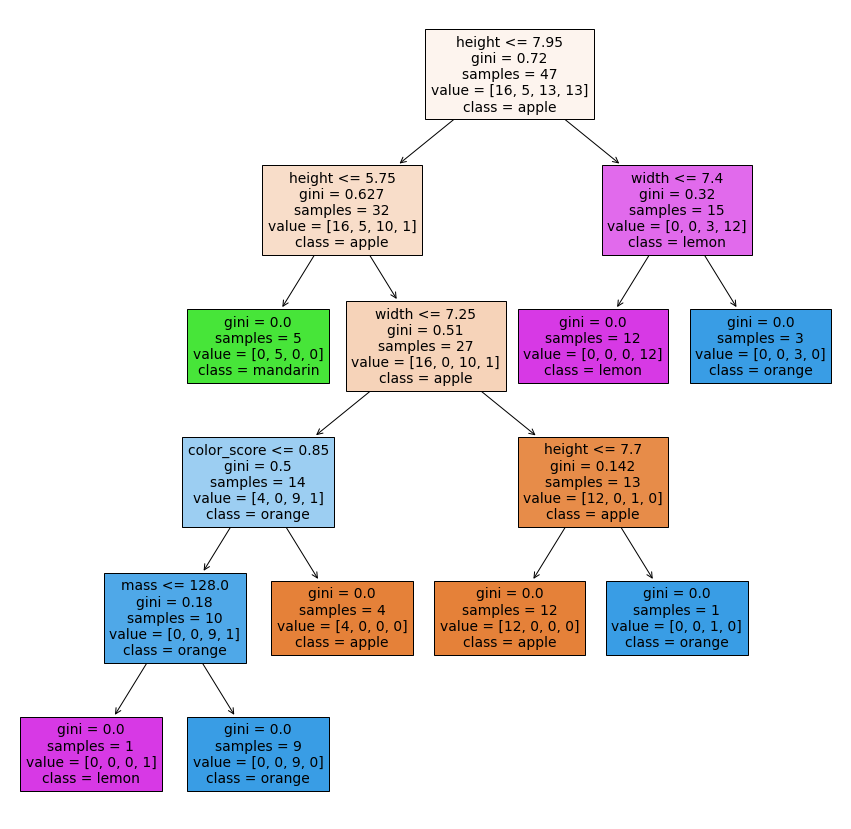

In [26]:
plt.figure(figsize=(15,15))
cols = ['mass', 'width', 'height', 'color_score']
classes = ['apple','mandarin','orange','lemon']
tree.plot_tree(model, 
               feature_names = cols, 
               class_names = classes,
               filled = True
              );

In [27]:
16+5+13+13

47

In [28]:
1- ((16/47)**2 + (5/47)**2 + (13/47)**2 + (13/47)**2)

0.7197827071072884

In [29]:
1-(3/15)**2-(12/15)**2

0.31999999999999984

In [30]:
# Example where we have 6 obs , 1 belonging to C1 and other to C2,
# gini index is 
1-(1/6)**2-(5/6)**2

0.2777777777777777

In [31]:
# For same entropy is
-1*((1/6)*np.log2(1/6) + (5/6)*np.log2(5/6))

0.6500224216483541

In [33]:
-1*( (6/6)*np.log2(6/6))

-0.0

In [34]:
-1*((3/6)*np.log2(3/6) + (3/6)*np.log2(3/6))

1.0

In [36]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6666666666666666

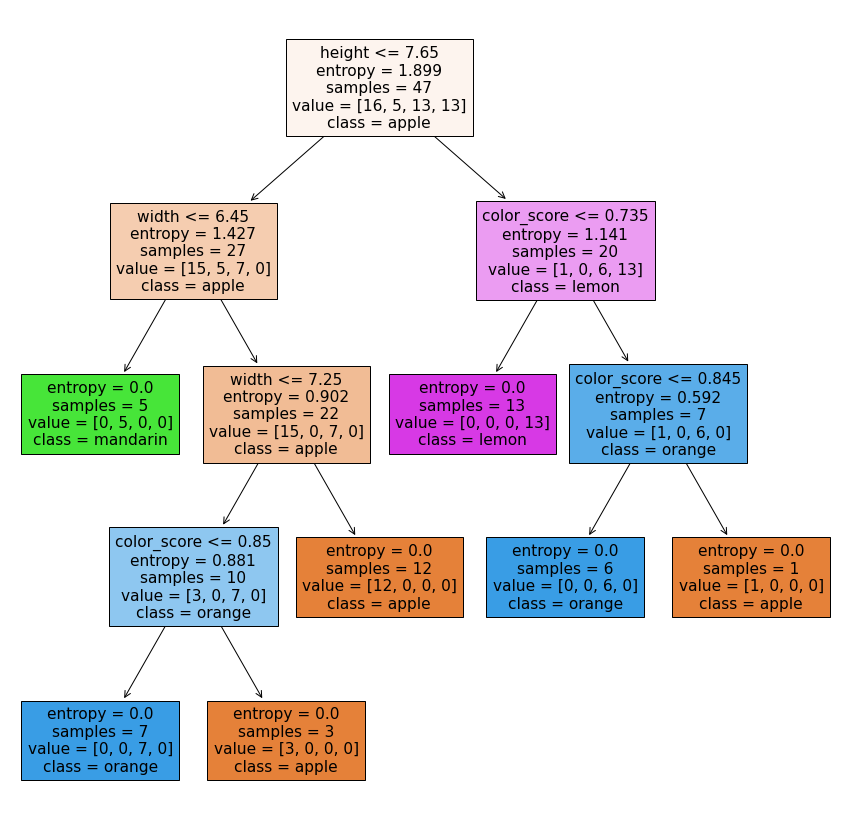

In [37]:
plt.figure(figsize=(15,15))
cols = ['mass', 'width', 'height', 'color_score']
classes = ['apple','mandarin','orange','lemon']
tree.plot_tree(model, 
               feature_names = cols, 
               class_names = classes,
               filled = True
              );

In [39]:
-1*((16/47)*np.log2(16/47) + (5/47)*np.log2(5/47)+(13/47)*np.log2(13/47)+(13/47)*np.log2(13/47))

1.898821337930718

In [ ]:
# For entropy formula
# -1 * Sum(prob of being in class*log to base no of classes(prob of being in class))

In [41]:
import math as m

In [44]:
-1*((16/47)*m.log((16/47),4) + (5/47)*m.log((5/47),4)+(13/47)*m.log((13/47),4)+(13/47)*m.log((13/47),4))

0.9494106689653592

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfmodel = RandomForestClassifier(n_estimators=5, 
                                                         bootstrap=True,
                                                        max_features=2)
rfmodel.fit(X_train, y_train).score(X_test, y_test)

0.75

In [50]:
rfmodel.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

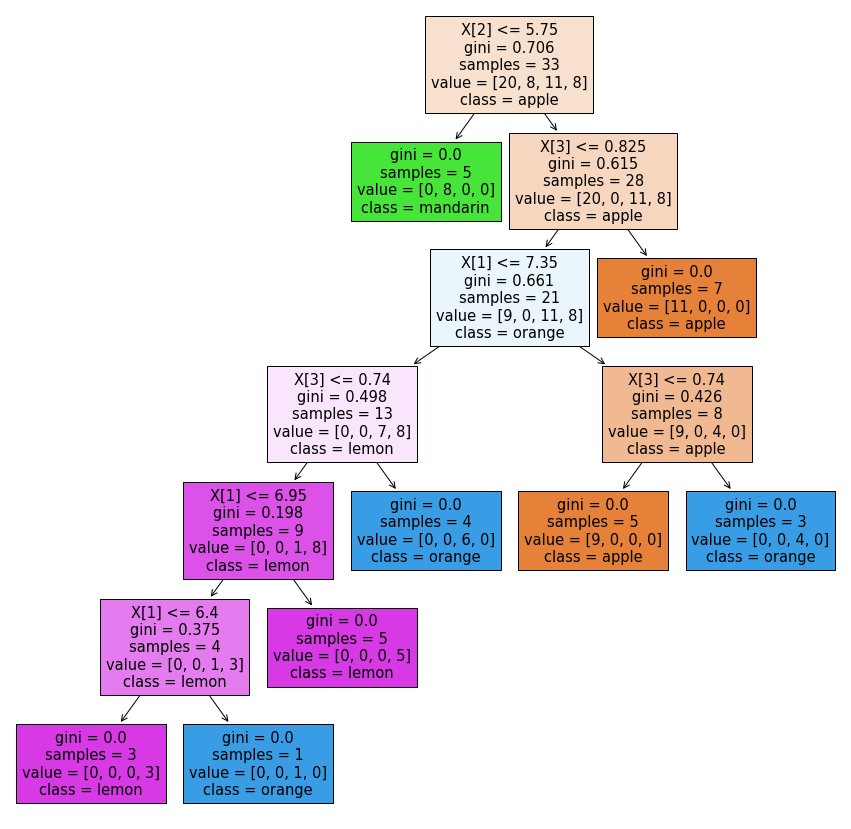

In [71]:
# Plot all the trees
plt.figure(figsize=(15,15))
#cols = ['mass', 'width', 'height', 'color_score']
classes = ['apple','mandarin','orange','lemon']
#for i in range(len(rfmodel.estimators_)):
tree.plot_tree(rfmodel.estimators_[0], 
               class_names = classes,
               filled = True
              );

## Hyper Parameter Fine Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
grid = dict()
grid['n_estimators'] = [5,10,50,100]
grid['criterion'] = ['gini', 'entropy']
grid['max_depth'] = [3,5]
grid

{'n_estimators': [5, 10, 50, 100],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5]}

In [74]:
rf = RandomForestClassifier()
tuned_model = GridSearchCV(rf, grid)
tuned_model.fit(X_train, y_train)
# You can check the best parameters it selects
tuned_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}